In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_diabetes

In [18]:
data = load_diabetes()
X_raw = data.data
Y = data.target.reshape(-1, 1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_raw)

In [19]:
print(data.feature_names)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [20]:
print(Y.shape[0])

442


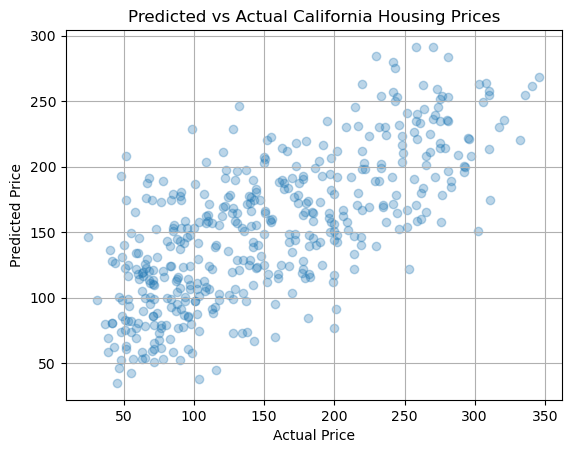

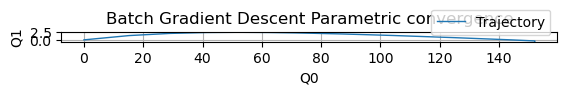

152.13348416289583
-0.4738164754580972
-11.404281563957765
24.73237393483501
15.427128268592709
-37.17864208365482
22.27838109748307
4.58192808140547
8.358051782892797
35.54765465774393
3.2185175768553913


In [21]:
m = X_scaled.shape[0]
ones = np.ones((m, 1))
X = np.hstack([ones, X_scaled])
Q = np.zeros((X.shape[1], 1))
Qz = [0 + 0j]
def grad_(X, Y, Q):
   H = X @ Q
   return (X.T @ (H - Y))/X.shape[0]
j = 0
b = 0.1
iters = 5000
while(j < iters):
    Q -= b*grad_(X, Y, Q)
    zn = Q[0, 0] + Q[1, 0]*1j
    Qz.append(zn)
    j += 1
df = pd.DataFrame(Qz, columns = ["Z"])
df["Re"] = df["Z"].apply(lambda x: x.real)
df["Im"] = df["Z"].apply(lambda x: x.imag)
H = X @ Q
plt.scatter(Y, H, alpha=0.3)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Predicted vs Actual California Housing Prices")
plt.grid(True)
plt.show()
plt.plot(df["Re"], df["Im"], label="Trajectory", linewidth=1)
plt.xlabel("Q0")
plt.ylabel("Q1")
plt.title("Batch Gradient Descent Parametric convergence")
plt.gca().set_aspect('equal')
plt.grid(True)
plt.legend()
plt.show()
k = 0
while(k < X.shape[1]):
    print(Q[k, 0])
    k += 1
#Uncomment the below lines to check closeness with analytically computed values.

#theta = np.linalg.inv(X.T @ X) @ X.T @ Y
#k = 0
#while(k < X.shape[1]):
#    print(theta[k, 0])
#    k += 1